https://www.kaggle.com/competitions/titanic

VotingClassifier (XGBoost, LGBM, CatBoost, GradientBoost) 0.77990

In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

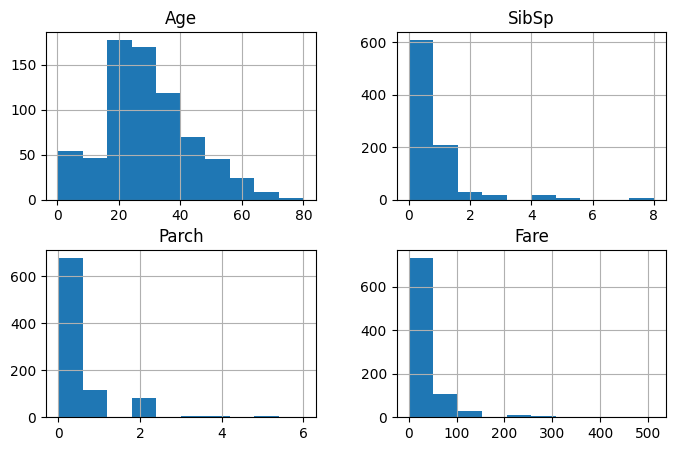

In [3]:
train.drop(['PassengerId', 'Survived', 'Pclass'], axis = 1).hist(figsize = (8, 5))

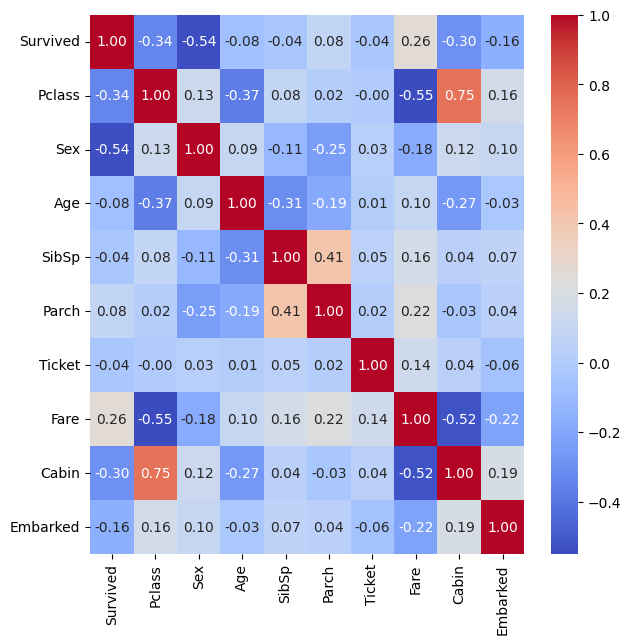

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

train['Cabin'] = train['Cabin'].str[0]
train['Ticket'] = train['Ticket'].str[0]

corr_df = train.drop('PassengerId', axis = 1).copy()

encoder = LabelEncoder()
corr_df['Sex'] = encoder.fit_transform(corr_df['Sex'].values)
encoder = LabelEncoder()
corr_df['Ticket'] = encoder.fit_transform(corr_df['Ticket'].values)
encoder = LabelEncoder()
corr_df['Cabin'] = encoder.fit_transform(corr_df['Cabin'].values)
encoder = LabelEncoder()
corr_df['Embarked'] = encoder.fit_transform(corr_df['Embarked'].values)

plt.figure(figsize = (7, 7))
sns.heatmap(corr_df.corr(numeric_only = True), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

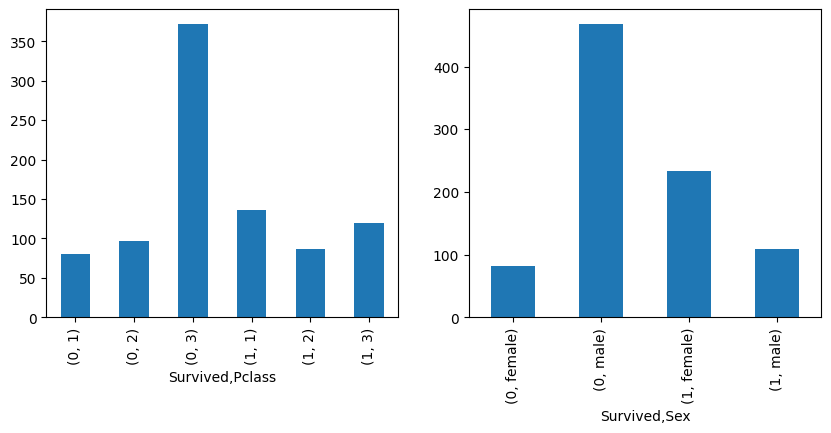

In [261]:
plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
x = train.groupby('Survived')['Pclass'].value_counts().sort_index()
x.plot(kind = 'bar')

plt.subplot(1, 2, 2)
x = train.groupby('Survived')['Sex'].value_counts().sort_index()
x.plot(kind = 'bar')

plt.show()

In [24]:
train.groupby(['SibSp'])['Age'].mean()

SibSp
0    31.397558
1    30.089727
2    22.620000
3    13.916667
4     7.055556
5    10.200000
8          NaN
Name: Age, dtype: float64

In [22]:
train.groupby(['Parch'])['Age'].mean()

Parch
0    32.178503
1    24.422000
2    17.216912
3    33.200000
4    44.500000
5    39.200000
6    43.000000
Name: Age, dtype: float64

In [26]:
train[train['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,C,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,C,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,C,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,C,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,C,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,C,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,C,69.55,NaN,S


In [15]:
train[train['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,3,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,2,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,3,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,C,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,3,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,3,7.8958,NaN,S


In [264]:
train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,1,80.0,B,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,1,80.0,B,NaN


In [11]:
train.groupby(['Pclass', 'Ticket'])['Fare'].mean().reset_index()

,Pclass,Ticket,Fare
0,1,1,65.503754
1,1,2,166.003125
2,1,3,92.558336
3,1,5,25.587500
4,1,6,15.500000
5,1,F,52.000000
6,1,P,122.080483
7,1,W,67.725000
8,2,1,18.333333
9,2,2,19.261274


In [263]:
train.groupby(['Pclass', 'Cabin', 'Embarked'])['Fare'].mean().reset_index()

,Pclass,Cabin,Embarked,Fare
0,1,A,C,38.357743
1,1,A,S,40.731763
2,1,B,C,145.964018
3,1,B,S,85.372283
4,1,C,C,98.582533
5,1,C,Q,90.000000
6,1,C,S,101.630442
7,1,D,C,85.586000
8,1,D,S,49.719906
9,1,E,C,92.905840


In [213]:
test = pd.read_csv('test.csv')

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [246]:
test[test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


### 전처리 순서

Age : 중간값 : 28, 또는 카테고리

Cabin /  Ticket 첫 글자 따기

1 : Fare
-   Cabin 또는 Embarked가 NaN 이면 -> Pclass/Ticket 이용하여 Fare
-   그렇지 않다면 Pclass/Cabin/Embarked 이용하여 Fare

2 : Cabin / Embarked
-  Pclass/둘 중 하나/0에 가까운 Fare의 값 채용

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

class Titanic_Preprocess:
    def __init__(self):
        self._encoders = []
        self._scalers = []
        

    def preprocessing(self, dataframe):
        df = dataframe.copy()

        df['Cabin'] = df['Cabin'].str[0]
        df['Ticket'] = df['Ticket'].str[0]

        self._is_train = _is_train(df)

        if self._is_train:
            self._median_age = df['Age'].median()
            self._ptf_table = df.groupby(['Pclass', 'Ticket'])['Fare'].mean().reset_index()
            self._pcef_table = df.groupby(['Pclass', 'Cabin', 'Embarked'])['Fare'].mean().reset_index() 

        df['Age'].fillna(self._median_age, inplace = True)

        nan_fare_idx = df[df['Fare'].isna()].index
        for i in nan_fare_idx:
            pclass, ticket, cabin, embarked = df.loc[i, ['Pclass', 'Ticket', 'Cabin', 'Embarked']]
            if type(cabin) == float or type(embarked) == float:
                temp = self._ptf_table[self._ptf_table['Pclass'] == pclass]
                fare = temp[temp['Ticket'] == ticket]['Fare'].values[0]
                df.loc[i, 'Fare'] = fare

            else:
                temp = self._pcef_table[self._pcef_table['Pclass'] == pclass]
                temp = temp[temp['Cabin'] == cabin]
                fare = temp[temp['Embarked'] == embarked]['Fare'].values[0]
                df.loc[i, 'Fare'] = fare

        nan_cabin_idx = df[df['Cabin'].isna()].index
        for i in nan_cabin_idx:
            pclass, embarked, fare = df.loc[i, ['Pclass', 'Embarked', 'Fare']]
            temp = self._pcef_table[self._pcef_table['Pclass'] == pclass]
            temp = temp[temp['Embarked'] == embarked]

            idx = abs(temp['Fare'].values - fare).argmin()
            pred_fare = temp['Fare'].values[idx]
            cabin = temp[temp['Fare'] == pred_fare]['Cabin'].values[0]
            df.loc[i, 'Cabin'] = cabin

        nan_embarked_idx = df[df['Embarked'].isna()].index
        for i in nan_embarked_idx:
            pclass, cabin, fare = df.loc[i, ['Pclass', 'Cabin', 'Fare']]
            temp = self._pcef_table[self._pcef_table['Pclass'] == pclass]
            temp = temp[temp['Cabin'] == cabin]

            idx = abs(temp['Fare'].values - fare).argmin()
            pred_fare = temp['Fare'].values[idx]
            embarked = temp[temp['Fare'] == pred_fare]['Embarked'].values[0]
            df.loc[i, 'Embarked'] = embarked

        df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

        df['Embarked'] = df['Embarked'].replace('C', 'C_Embarked')

        numerical = ['Age', 'SibSp', 'Parch', 'Fare']
        categorical = ['Sex', 'Cabin', 'Embarked']
        if self._is_train:
            for col in numerical:
                scaler = StandardScaler()
                df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))
                self._scalers.append(scaler)

            for col in categorical:
                encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
                encoded_data = encoder.fit_transform(df[col].values.reshape(-1, 1))
                concat_df = pd.DataFrame(data = encoded_data, columns = encoder.get_feature_names_out())
                df = pd.concat([df, concat_df], axis = 1)
                df.drop(col, axis = 1, inplace = True)
                self._encoders.append(encoder)

        else:
            for i in range(len(numerical)):
                col = numerical[i]
                scaler = self._scalers[i]
                df[col] = scaler.transform(df[col].values.reshape(-1, 1))

            for i in range(len(categorical)):
                col = categorical[i]
                encoder = self._encoders[i]
                encoded_data = encoder.transform(df[col].values.reshape(-1, 1))
                concat_df = pd.DataFrame(data = encoded_data, columns = encoder.get_feature_names_out())
                df = pd.concat([df, concat_df], axis = 1)
                df.drop(col, axis = 1, inplace = True)

        return df

def _is_train(df):
    if 'Survived' in df:
        return True
    else:
        return False

In [16]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

preprocessor = Titanic_Preprocess()

X_train = preprocessor.preprocessing(train)
X_test = preprocessor.preprocessing(test)

C:\Users\user\AppData\Local\Temp\ipykernel_11708\2088958577.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(self._median_age, inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_11708\2088958577.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [17]:
X_train

,Survived,Pclass,Age,SibSp,Parch,Fare,x0_female,x0_male,x0_A,x0_B,x0_C,x0_D,x0_E,x0_F,x0_G,x0_T,x0_C_Embarked,x0_Q,x0_S
0,0,3,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,1,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,3,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1,1,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,3,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,-0.181487,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1,1,-0.796286,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0,3,-0.104637,0.432793,2.008933,-0.176263,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
889,1,1,-0.258337,-0.474545,-0.473674,-0.044381,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
X_test

,Pclass,Age,SibSp,Parch,Fare,x0_female,x0_male,x0_A,x0_B,x0_C,x0_D,x0_E,x0_F,x0_G,x0_T,x0_C_Embarked,x0_Q,x0_S
0,3,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,3,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,3,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,-0.104637,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
414,1,0.740711,-0.474545,-0.473674,1.544246,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
415,3,0.702286,-0.474545,-0.473674,-0.502445,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
416,3,-0.104637,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train.drop('Survived', axis = 1), X_train['Survived'], test_size = 0.2, random_state = 42)

In [23]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

import time
from sklearn.metrics import accuracy_score

xgb_clf = xgb.XGBClassifier(random_state = 42)
lgb_clf = lgb.LGBMClassifier(random_state = 42, verbose = -1)
cat_clf = CatBoostClassifier(random_state = 42, verbose = False)
gb_clf = GradientBoostingClassifier(random_state = 42)
rf_clf = RandomForestClassifier(random_state = 42)

x = time.time()
xgb_clf.fit(x_train, y_train)
print('xgb', time.time() - x)

x = time.time()
lgb_clf.fit(x_train, y_train)
print('lgb', time.time() - x)

x = time.time()
cat_clf.fit(x_train, y_train)
print('cat', time.time() - x)

x = time.time()
gb_clf.fit(x_train, y_train)
print('gb', time.time() - x)

x = time.time()
rf_clf.fit(x_train, y_train)
print('rf', time.time() - x)

pred1 = xgb_clf.predict(x_test)
pred2 = lgb_clf.predict(x_test)
pred3 = cat_clf.predict(x_test)
pred4 = gb_clf.predict(x_test)
pred5 = rf_clf.predict(x_test)

print()
print(accuracy_score(y_test, pred1))
print(accuracy_score(y_test, pred2))
print(accuracy_score(y_test, pred3))
print(accuracy_score(y_test, pred4))
print(accuracy_score(y_test, pred5))

xgb 0.06210017204284668
lgb 0.024654626846313477
cat 1.203906774520874
gb 0.09389948844909668
rf 0.09264683723449707

0.7877094972067039
0.8268156424581006
0.8268156424581006
0.8156424581005587
0.7821229050279329


In [25]:
from sklearn.ensemble import VotingClassifier

vot_clf = VotingClassifier(
    estimators = [('xgb', xgb.XGBClassifier(random_state = 42)),
                  ('lgb', lgb.LGBMClassifier(random_state = 42, verbose = -1)),
                  ('cat', CatBoostClassifier(random_state = 42, verbose = False)),
                  ('gb', GradientBoostingClassifier(random_state = 42))],
    voting = 'soft',
    weights = [0.7877094972067039, 0.8268156424581006, 0.8268156424581006, 0.8156424581005587]
    )

vot_clf.fit(x_train, y_train)
vot_pred = vot_clf.predict(x_test)
accuracy_score(y_test, vot_pred)

0.8379888268156425

In [26]:
vot_clf = VotingClassifier(
    estimators = [('xgb', xgb.XGBClassifier(random_state = 42)),
                  ('lgb', lgb.LGBMClassifier(random_state = 42, verbose = -1)),
                  ('cat', CatBoostClassifier(random_state = 42, verbose = False)),
                  ('gb', GradientBoostingClassifier(random_state = 42))],
    voting = 'soft',
    weights = [0.7877094972067039, 0.8268156424581006, 0.8268156424581006, 0.8156424581005587]
    )

vot_clf.fit(X_train.drop('Survived', axis = 1), X_train['Survived'])
vot_pred = vot_clf.predict(X_test)

In [29]:
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = vot_pred
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [31]:
submission.to_csv('submission.csv', index = False)